# Cloning my repository
It contains the training and testing images

In [1]:
! git clone https://github.com/Vishwanath-Ayyappan/Computer-Vision-Project

Cloning into 'Computer-Vision-Project'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [3]:
%cd /content/Computer-Vision-Project 
# Moving to current directory

/content/Computer-Vision-Project


# Imports

In [4]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Reading Training Images

In [52]:
training_images = '/content/Computer-Vision-Project/Training'
image_size = [195,231] 

"""
This function takes each training image and read it as a array and 
appends it to a directory
"""
def read_images(path, default_size=image_size):
    images = []
    images_labels=[]
    image_dirs = [image for image in os.listdir(path) if not image.startswith('.')]
    res = [sub[: -4] for sub in image_dirs]
    for image_dir in image_dirs:
        dir_path = os.path.join(path, image_dir)
        image = Image.open (dir_path)
        image = image.convert ("L")
        if (default_size is not None ):
            image = image.resize (default_size , Image.ANTIALIAS )
        images.append(np.array (image , dtype =np. uint8 ))
        images_labels.append(image_dir)
    return [images,images_labels]

In [53]:
[X_train, y_train] = read_images(path=training_images) 

In [54]:
# Printing Training Labels
print('Training Labels:')
y_train

Training Labels:


['subject01.happy.jpg',
 'subject07.centerlight.jpg',
 'subject15.normal.jpg',
 'subject14.normal.jpg',
 'subject10.normal.jpg',
 'subject03.normal.jpg',
 'subject02.normal.jpg',
 'subject11.normal.jpg']

In [20]:
# Shape of one input training image
print('Training Image Shape',X_train[0].shape)

Training Image Shape (231, 195)


In [21]:
# Shape of the Training data
print('Training Data Shape',np.array(X_train).shape)

Training Data Shape (8, 231, 195)




```
Input Training image shape (NxN)= (231, 195)

Total Training data shape (MxNxN) = (8, 231, 195)

```




# Mean Face

In [23]:
'''
This function stacks a NxN matrix into N^2x1 vector
'''
def stack (X):
    if len (X) == 0:
        return np.array([])
    vector = np.empty((0,X[0].size),dtype=X[0].dtype)
    for row in X:
        vector = np.vstack((vector,np.asarray(row).reshape(1,-1)))
    return vector


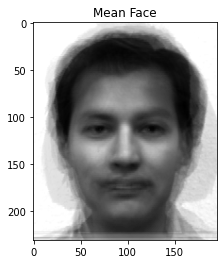

In [31]:
mean_matrix = np.reshape(stack(X_train).mean(axis=0), X_train[0].shape)
plt.imshow(mean_matrix, cmap=plt.cm.gray)
plt.title("Mean Face");
plt.savefig('Mean_Face.jpg')

In [25]:
print('Mean Face Shape:',mean_matrix.shape)

Mean Face Shape: (231, 195)


# PCA

In [27]:
"""
The choose_num_components_function selects the top M components while preserving high variance
"""
def choose_num_components(eigenvalues, variance=.95):
    for ii, eigen_value_cumsum in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):
        if eigen_value_cumsum > variance:
            return ii

"""
PCA is done and eigen vector and eigen values are retured
"""
def pca (X, y, num_components =0):
    [n,d] = X.shape
    if ( num_components <= 0) or ( num_components >n):
        num_components = n
        mu = X.mean( axis =0)
        X = X - mu
    if n>d:
        C = np.dot(X.T,X) # Covariance Matrix
        [ eigenvalues , eigenvectors ] = np.linalg.eigh(C)
    else :
        C = np.dot (X,X.T) # Covariance Matrix
        [ eigenvalues , eigenvectors ] = np.linalg.eigh(C)
        eigenvectors = np.dot(X.T, eigenvectors )
        for i in range (n):
            eigenvectors [:,i] = eigenvectors [:,i]/ np.linalg.norm( eigenvectors [:,i])
    # Selecting top M eigen vectors by sorting them in descending order.
    idx = np.argsort (- eigenvalues )
    eigenvalues = eigenvalues [idx ]
    eigenvectors = eigenvectors [:, idx ]
    num_components = choose_num_components(eigenvalues)
    eigenvalues = eigenvalues [0: num_components +3].copy ()
    eigenvectors = eigenvectors [: ,0: num_components+3 ].copy ()
    return [ eigenvalues , eigenvectors , mu]  

[eigenvalues, eigenvectors, mean] = pca (stack(X_train), y_train)

In [28]:
print('Eigen Vectors Shape:',np.array(eigenvectors).shape)
print('Eigen Values Shape:',np.array(eigenvalues).shape)

Eigen Vectors Shape: (45045, 8)
Eigen Values Shape: (8,)




```
Eigen vector shape(N^2xM) = (231x195,8)
M = Number of Training samples = 8
```



# Plot Top M Eigenfaces

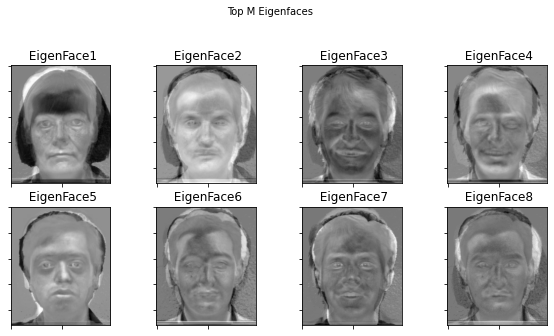

In [30]:
def subplot ( title , images , rows , cols , sptitle ="", sptitles =[] , colormap = plt.cm.gray, filename = None, figsize = (10, 10) ):
    fig = plt.figure(figsize = figsize)
    # main title
    fig.text (.5 , .95 , title , horizontalalignment ="center")
    for i in range ( len ( images )):
        ax0 = fig.add_subplot( rows , cols ,( i +1))
        plt.setp ( ax0.get_xticklabels() , visible = False )
        plt.setp ( ax0.get_yticklabels() , visible = False )
        if len ( sptitles ) == len ( images ):
            plt.title("%EigenFace #%s" % ( sptitle , str ( sptitles [i ]) )  )
        else:
            plt.title("%s EigenFace%d" % ( sptitle , (i +1) )  )
        plt.imshow(np.asarray(images[i]) , cmap = colormap )
    if filename is None :
        plt.show()
    else:
        fig.savefig( filename )

        
E = []
number = eigenvectors.shape[1]
for i in range (min(number, 16)):
    e = eigenvectors[:,i].reshape(X_train[0].shape )
    E.append(np.asarray(e))
subplot ( title ="Top M Eigenfaces", images=E, rows =4, cols =4, colormap =plt.cm.gray , filename ="eigenfaces.jpg")


# Eigen Co-efficients for Training Images

In [33]:
count=1
for i in X_train:
    R_i=i.reshape(45045,1) # Reshaping the matrix to vector
    eigen_coeff=np.matmul(eigenvectors.transpose(),R_i) # Projecting the training face image into eigenface space
    print('Eigen_Face_Co-efficient for training image for '+str(count)+':\n',eigen_coeff)
    count=count+1

Eigen_Face_Co-efficient for training image for 1:
 [[-11455.31321183]
 [   575.61055704]
 [-21528.29417198]
 [  1400.79061033]
 [ -1376.09515463]
 [  5328.59564468]
 [  2863.95853702]
 [ -6571.22164446]]
Eigen_Face_Co-efficient for training image for 2:
 [[-10768.04901166]
 [ -8906.99948762]
 [ -9367.81626361]
 [ -3382.21863686]
 [ -5352.57444743]
 [  4887.76170677]
 [  3787.15142831]
 [ -3683.45008505]]
Eigen_Face_Co-efficient for training image for 3:
 [[-18578.27226476]
 [  4260.67922502]
 [-11129.68523645]
 [ -6652.79119894]
 [  -647.44033389]
 [  8850.30445809]
 [   -58.33109198]
 [  3085.84731527]]
Eigen_Face_Co-efficient for training image for 4:
 [[ -9084.34629059]
 [ -7603.48791243]
 [-16650.85053139]
 [ -3305.93369717]
 [ -3273.59914592]
 [  5620.7284802 ]
 [ -4680.08327893]
 [ -8585.32378332]]
Eigen_Face_Co-efficient for training image for 5:
 [[-10390.24178921]
 [ -7190.66584618]
 [-12888.31603189]
 [ -3918.16174562]
 [  6352.42549847]
 [  3487.06707173]
 [   955.53109616]


In [36]:
eigen_coeff.shape

(8, 1)



```
Each training face can then be projected onto the face space to obtain its eigenface coefficients 
Ω𝑖=𝑈^T𝑅𝑖 for 𝑖=1to𝑀

(MxN^2)X(N^2x1) =Mx1
Eigen Co-efficient shape for each training image = (8, 1)


```



In [34]:
# Saving the eigen co-efficients into text file
with open('Eigen_Coeff_Training_images.txt', 'w') as f:
    count=1
    for i in X_train:
        R_i=i.reshape(45045,1) # Reshaping the matrix to vector
        eigen_coeff=np.matmul(eigenvectors.transpose(),R_i) # Projecting the training face image into eigenface space
        print('Eigen_Face_Co-efficient for training image for '+str(count)+':\n',eigen_coeff, file=f)
        count=count+1

# Reading Test Images

In [42]:
test_images='/content/Computer-Vision-Project/Testing'
X_test,y_test=read_images(path=test_images)

In [44]:
print('Test Dataset Shape: ',np.array(X_test).shape)

Test Dataset Shape:  (6, 231, 195)


# Eigen Co-efficients for Test Images

In [46]:
count=1
for i in X_test:
    R_i=i.reshape(45045,1) # Reshaping the matrix to vector
    eigen_coeff=np.matmul(eigenvectors.transpose(),R_i) # Projecting the test face image into eigenface space
    print('Eigen_Face_Co-efficient for test image for '+str(count)+':\n',eigen_coeff)
    count=count+1

Eigen_Face_Co-efficient for test image for 1:
 [[-16608.43742774]
 [ -1235.11344439]
 [ -9908.29975763]
 [ -5147.60189204]
 [ -3746.17723139]
 [  3313.2396691 ]
 [   477.96346739]
 [ -1485.40648523]]
Eigen_Face_Co-efficient for test image for 2:
 [[-15596.66958355]
 [ -3304.93320258]
 [-10859.97222317]
 [ -4119.47942364]
 [ -3113.98825305]
 [  4340.40472884]
 [  2081.4598034 ]
 [ -2567.22740275]]
Eigen_Face_Co-efficient for test image for 3:
 [[-10001.52392006]
 [ -6511.90803946]
 [-17194.35045692]
 [ -2982.9463799 ]
 [ -4001.66402628]
 [  5281.74503293]
 [ -1767.29822874]
 [ -7654.65601731]]
Eigen_Face_Co-efficient for test image for 4:
 [[-10004.80741523]
 [ -7189.44301695]
 [-15704.95681709]
 [ -3235.06745952]
 [ -3479.86964405]
 [  4399.47069493]
 [ -3144.1526114 ]
 [ -8169.40988952]]
Eigen_Face_Co-efficient for test image for 5:
 [[ -9777.59141506]
 [  -608.59477892]
 [-21511.06230793]
 [  -726.66711531]
 [ -1032.684361  ]
 [  5503.23314757]
 [   966.1935217 ]
 [ -7196.78059147]]


In [47]:
# Saving the eigen co-efficients into text file
with open('Eigen_Coeff_Test_images.txt', 'w') as f:
    count=1
    for i in X_test:
        R_i=i.reshape(45045,1) # Reshaping the matrix to vector
        eigen_coeff=np.matmul(eigenvectors.transpose(),R_i) # Projecting the test face image into eigenface space
        print('Eigen_Face_Co-efficient for test image for '+str(count)+':\n',eigen_coeff, file=f)
        count=count+1

# Recognition

## Classification using 1-Nearest Neighbor

Euclidean Distance metric is used

In [48]:
def euclidean_dist(p,q):
    p = np.asarray(p).flatten()
    q = np.asarray (q).flatten()
    return np.sqrt (np.sum (np. power ((p-q) ,2)))

In [50]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def predict (W, mu , projections, X):
    minDist = float("inf")
    minClass = -1
    Q = project (W, X.reshape (1 , -1) , mu)
    for i in range (len(projections)):
        dist = euclidean_dist( projections[i], Q)
        if dist < minDist:
            minDist = dist
            minClass = i
    return minClass

projections = []
for xi in X_train:
    projections.append(project (eigenvectors, xi.reshape(1 , -1) , mean))

In [82]:
def subplot2 ( title , images , rows , cols , sptitle ="", sptitles =[] , colormap = plt.cm.gray, filename = None, figsize = (10, 10) ):
    fig = plt.figure(figsize = figsize)
    # main title
    fig.text (.5 , .95 , title , horizontalalignment ="center")
    for i in range ( len ( images )):
        ax0 = fig.add_subplot( rows , cols ,( i +1))
        plt.setp ( ax0.get_xticklabels() , visible = False )
        plt.setp ( ax0.get_yticklabels() , visible = False )
        if len ( sptitles ) == len ( images ):
            plt.title("%s %s" % ( sptitle , str ( sptitles [i ]) )  )
        else:
            plt.title("%s %d" % ( sptitle , (i +1) )  )
        plt.imshow(np.asarray(images[i]) , cmap = colormap )
    if filename is None :
        plt.show()
    else:
        fig.savefig( filename )

In [ ]:
def accuracy(X,y):
  if X[:9]==y[:9]:
    

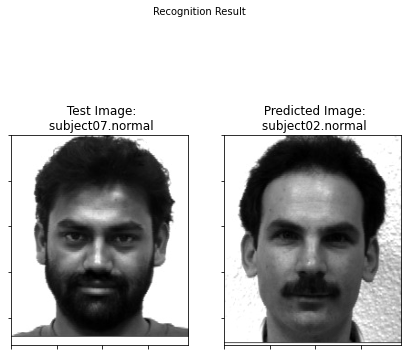

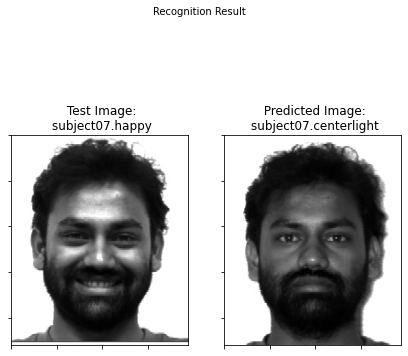

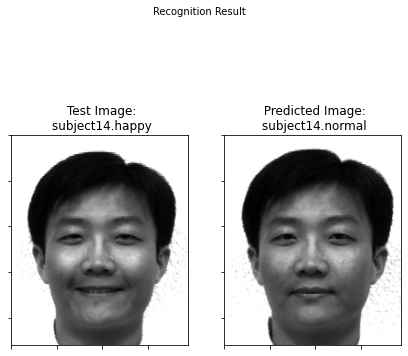

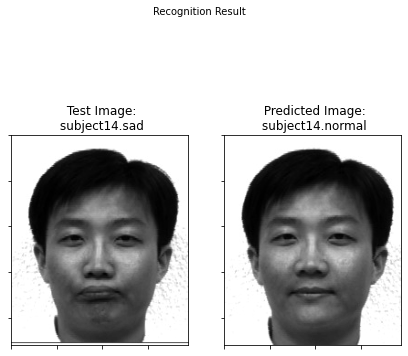

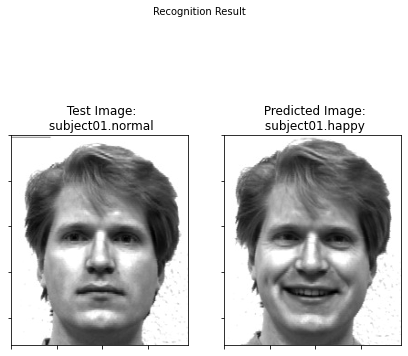

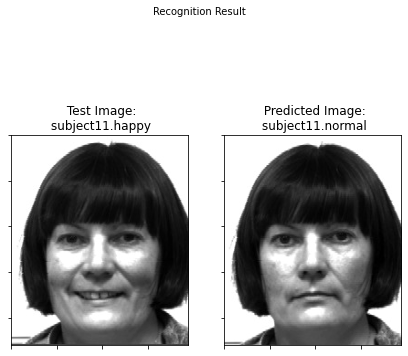

In [94]:
count=0
for i in os.listdir('/content/Computer-Vision-Project/Testing'):
  if i[-4:]=='.jpg':
    img='/content/Computer-Vision-Project/Testing/'+i
    image = Image.open(img)
    image = image.convert ("L")
    if (image_size is not None ):
        image = image.resize (image_size , Image.ANTIALIAS )
    test_image = np. asarray (image , dtype =np. uint8 )
    predicted = predict(eigenvectors, mean , projections, test_image)
    if i[:9]==y_train[predicted][:9]:
      count=count+1
    subplot2(title ="Recognition Result", images =[test_image, X_train[predicted]], rows =1, cols =2, 
         sptitles = ["Test Image:\n {0}".format(i[:-4]), "Predicted Image:\n {0}".format(y_train[predicted][:-4])] , colormap =plt.cm.gray , 
          filename=i[:-4]+'_output.jpg',figsize = (7,7))
  

# Recognition Accuracy

In [93]:
print("Recognition Accuracy:"+str((count/6)*100)+'%')

Recognition Accuracy:83.33333333333334%
